In [ ]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Flatten, Dropout, Conv1D
from keras.layers import Embedding
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data = pd.read_csv('depression.csv')
#data = pd.read_csv('Finaldepression.csv')
data = pd.read_csv('/content/drive/MyDrive/Depression_Code/NewFinaldepression (1).csv')
data = data.drop(['SEQN','SLQ310Wake'], axis=1)

In [ ]:
empty_columns = data.columns[data.isnull().all()]

data = data.drop(empty_columns, axis=1)
data.shape

(2849, 146)

In [ ]:
data = data.dropna()

# Reset the index of the DataFrame
data = data.reset_index(drop=True)
data.shape

(2849, 146)

In [ ]:
X = data.drop('Depression', axis=1)  # Assuming 'DepressionLabel' is the target variable
y = data['Depression']
print(sorted(y.unique()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


In [ ]:
2849*0.15

427.34999999999997

In [ ]:
from keras.utils import to_categorical
#y_train_oh = to_categorical(y_train, num_classes=6)
#y_val_oh = to_categorical(y_val, num_classes=6)
#y_test_oh = to_categorical(y_test, num_classes=6)

In [ ]:
#X.iloc[train_index].shape"
#y_pred_list[-1]

In [ ]:
epochs = 10

In [ ]:
# Assuming X and y are your features and labels, respectively
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc_values = []
f1_values = []
mae_values = []
y_pred_list = []
y_test_list = []

kf_counter = 0
for train_index, test_index in kf.split(X):
    kf_counter += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("KF Counter: ", kf_counter)
    print(X_train.shape)
    print(X_test.shape)
    print(X_train.shape[1])
    #X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)

    #X_train = np.array(X_train).reshape(-1, X_train.shape[1], 1)
    #X_val = np.array(X_val).reshape(-1, X_val.shape[1], 1)
    #X_test = np.array(X_test).reshape(-1, X_test.shape[1], 1)

    y_train_oh = to_categorical(y_train, num_classes=6)
    #y_val_oh = to_categorical(y_val, num_classes=6)
    y_test_oh = to_categorical(y_test, num_classes=6)

    model = Sequential()
    model.add(Embedding(input_dim=2000, output_dim=64, input_length=X_train.shape[1]))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Assuming you have one-hot encoded your labels
    history = model.fit(X_train, y_train_oh, epochs=epochs, batch_size=32, validation_split=0.2)
    #history = model.fit(X_train, y_train_oh, epochs=5, batch_size=32, validation_data=(X_val, y_val_oh) )

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_list.append(y_pred)
    y_test_list.append(y_test_oh)

    y_pred_int = (y_pred > 0.5).astype(int)
    # Evaluate the model
    accuracy = accuracy_score(y_test_oh, y_pred_int)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    acc_values.append(accuracy * 100)
    f1 = f1_score(y_test_oh, y_pred_int, average='micro')
    f1_values.append(f1 * 100)
    print("F1 Score: {:.2f}%".format(f1 * 100))

    #mae = mean_absolute_error(y_test_oh, y_pred)
    #mae_values.append(mae)

    #print("Fold MAE: {:.5f}".format(mae))

# Calculate average MAE across all folds
#average_mae = np.mean(mae_values)
#print("Average MAE across all folds: {:.5f}".format(average_mae))


KF Counter:  1
(2279, 145)
(570, 145)
145
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.4374 - loss: 1.3619 - val_accuracy: 0.8070 - val_loss: 0.7132
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7449 - loss: 0.6661 - val_accuracy: 0.8618 - val_loss: 0.3734
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8510 - loss: 0.4123 - val_accuracy: 0.9079 - val_loss: 0.2305
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8988 - loss: 0.2809 - val_accuracy: 0.9276 - val_loss: 0.1611
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9302 - loss: 0.2069 - val_accuracy: 0.9298 - val_loss: 0.1604
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9282 - loss: 0.1827 - val_accuracy: 0.9342 - val_loss: 0.1323
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9489 - loss: 0.1522 - val_accuracy: 0.9474 - val_loss: 0.1043
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.9499 - loss: 0.1377 - val_accuracy: 0.9561 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.4106 - loss: 1.3724 - val_accuracy: 0.7851 - val_loss: 0.6425
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7532 - loss: 0.6893 - val_accuracy: 0.8640 - val_loss: 0.3788
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8489 - loss: 0.4249 - val_accuracy: 0.9320 - val_loss: 0.2253
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8878 - loss: 0.2837 - val_accuracy: 0.9364 - val_loss: 0.1780
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9282 - loss: 0.2004 - val_accuracy: 0.9605 - val_loss: 0.1217
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9396 - loss: 0.1554 - val_accuracy: 0.9539 - val_loss: 0.1112
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9362 - loss: 0.1510 - val_accuracy: 0.9627 - val_loss: 0.0858
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9415 - loss: 0.1445 - val_accuracy: 0.9627 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4166 - loss: 1.3865 - val_accuracy: 0.7851 - val_loss: 0.6766
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7753 - loss: 0.6254 - val_accuracy: 0.8772 - val_loss: 0.3522
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8545 - loss: 0.4244 - val_accuracy: 0.9167 - val_loss: 0.2612
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8661 - loss: 0.3341 - val_accuracy: 0.9408 - val_loss: 0.1779
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8965 - loss: 0.2396 - val_accuracy: 0.9342 - val_loss: 0.1411
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9042 - loss: 0.2195 - val_accuracy: 0.9386 - val_loss: 0.1263
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9240 - loss: 0.1739 - val_accuracy: 0.9496 - val_loss: 0.1184
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9285 - loss: 0.1608 - val_accuracy: 0.9627 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4401 - loss: 1.3430 - val_accuracy: 0.7303 - val_loss: 0.7532
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7549 - loss: 0.6890 - val_accuracy: 0.8531 - val_loss: 0.4057
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8397 - loss: 0.4398 - val_accuracy: 0.8882 - val_loss: 0.2631
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9059 - loss: 0.2634 - val_accuracy: 0.9298 - val_loss: 0.1633
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9492 - loss: 0.1771 - val_accuracy: 0.9539 - val_loss: 0.1191
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9357 - loss: 0.1677 - val_accuracy: 0.9408 - val_loss: 0.1049
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.9554 - loss: 0.1261 - val_accuracy: 0.9474 - val_loss: 0.0956
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9575 - loss: 0.1106 - val_accuracy: 0.9737 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4104 - loss: 1.3677 - val_accuracy: 0.7171 - val_loss: 0.7736
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7222 - loss: 0.7416 - val_accuracy: 0.8728 - val_loss: 0.4079
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8392 - loss: 0.4329 - val_accuracy: 0.9276 - val_loss: 0.2244
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9056 - loss: 0.2616 - val_accuracy: 0.9605 - val_loss: 0.1247
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9453 - loss: 0.1669 - val_accuracy: 0.9539 - val_loss: 0.0959
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9456 - loss: 0.1335 - val_accuracy: 0.9737 - val_loss: 0.0773
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9578 - loss: 0.1084 - val_accuracy: 0.9759 - val_loss: 0.0698
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9590 - loss: 0.0966 - val_accuracy: 0.9737 - val_loss: 0.

In [ ]:
alpha = np.random.uniform(0.3, 1.0) #leave this
beta = np.random.uniform(0, alpha)
print(alpha, beta)

0.6950770387067755 0.3771442726145205


In [ ]:
#accuracy = accuracy_score(y_test_oh[indices_with_ones], y_pred_inside)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def calculate_threshold():
    alpha = np.random.uniform(0.3, 1.0)
    beta = np.random.uniform(0, alpha)

    max_iterations = 100
    best_score = -np.inf
    best_alpha, best_beta = alpha, beta

    accuracy_weight = 0.6
    generality_weight = 0.4
    y_pred = y_pred_list[-1]
    y_test_oh = y_test_list[-1]

    for iteration in range(max_iterations):
        y_pred_inside = (y_pred >= alpha).astype(int)  # Apply threshold α to classify as 0 or 1
        indices_with_ones = np.where(y_pred_inside.any(axis=1))[0]
        #y_pred_out = (y_pred <= beta).astype(int)
        #y_pred_partial = ((y_pred > beta & y_pred < alpha).astype(int)

        # Calculate accuracy and generality
        accuracy = accuracy_score(y_test_oh[indices_with_ones], y_pred_inside[indices_with_ones])
        generality = len(indices_with_ones)/len(y_pred_inside)

        # Calculate overall score with weighted trade-off between accuracy and generality
        score = accuracy_weight * accuracy + generality_weight * generality

        # Update best score and parameters if current score is better
        if score > best_score:
            best_score = score
            best_alpha, best_beta = alpha, beta

        # Adjust alpha and beta slightly in search for better thresholds
        alpha = np.clip(alpha + np.random.uniform(-0.05, 0.05), 0, 1)
        beta = np.clip(beta + np.random.uniform(-0.05, 0.05), 0, 1)
    return best_alpha, best_beta, best_score

In [ ]:
#####################################################
best_alpha, best_beta, best_score = calculate_threshold()
print("Optimal thresholds found:")
print("Alpha (accuracy threshold):", best_alpha)
print("Beta (generality threshold):", best_beta)
print("Best Score (combined accuracy and generality):", best_score)
########################################################

Optimal thresholds found:
Alpha (accuracy threshold): 0.6226577857318475
Beta (generality threshold): 0.16077486768080845
Best Score (combined accuracy and generality): 0.986582214919738


In [ ]:
thresholds = [(i, j) for i in np.arange(0, 1, 0.01) for j in np.arange(0, 1, 0.01)]
print(np.array(thresholds).shape)

thresholds = [(i, j) for i in np.arange(0, 1, 0.01) for j in np.arange(0, 1, 0.01) if i > j]
print(np.array(thresholds).shape)

(10000, 2)
(4950, 2)


In [ ]:
best_alpha, best_beta = thresholds[0]
print(best_alpha)
print(best_beta)
#print(np.where(y_pred_inside.any(axis=1))[0])
#print(y_pred_inside.sum(axis=1))

0.01
0.0


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def calculate_threshold_brute():
    best_score = best_accuracy = best_generality = 0
    best_alpha, best_beta = thresholds[0]

    accuracy_weight = 0.6
    generality_weight = 0.4
    y_pred = y_pred_list[-1]
    y_test_oh = y_test_list[-1]

    for alpha, beta in thresholds:
        y_pred_inside = (y_pred >= alpha).astype(int)  # Apply threshold α to classify as 0 or 1
        indices_with_ones = np.where(y_pred_inside.any(axis=1))[0]
        #y_pred_out = (y_pred <= beta).astype(int)
        #y_pred_partial = ((y_pred > beta & y_pred < alpha).astype(int)

        # Calculate accuracy and generality
        accuracy = accuracy_score(y_test_oh[indices_with_ones], y_pred_inside[indices_with_ones])
        generality = len(indices_with_ones)/len(y_pred_inside)

        # Calculate overall score with weighted trade-off between accuracy and generality
        score = accuracy_weight * accuracy + generality_weight * generality

        # Update best score and parameters if current score is better
        if score > best_score:
            best_score = score
            best_alpha, best_beta = alpha, beta
            best_accuracy, best_generality = accuracy, generality

    return best_alpha, best_beta, best_score, best_accuracy, best_generality

In [ ]:
#####################################################
best_alpha, best_beta, best_score, best_accuracy, best_generality = calculate_threshold_brute()
print("Best Alpha:", best_alpha)
print("Best Beta:", best_beta)
print("Best Trade Accuracy:", best_accuracy)
print("Best Trade Generality:", best_generality)
print("Best Score (combined accuracy and generality):", best_score)
########################################################

Best Alpha: 0.32
Best Beta: 0.0
Best Trade Accuracy: 0.9876760563380281
Best Trade Generality: 0.9982425307557118
Best Score (combined accuracy and generality): 0.9919026461051016


In [ ]:
###### Game Theoretic Roughsets

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def calculate_threshold_game_theory(y_pred, y_test_oh, alpha_start=1.0, beta_start=0.001, c=0.1, max_iteration=100):
    alpha = alpha_start
    beta = beta_start

    accuracy_weight = 0.6
    generality_weight = 0.4

    def compute_generality(a, b):
        y_pred_inside = (y_pred >= a).astype(int)
        indices_with_ones = np.where(y_pred_inside.any(axis=1))[0]
        generality = len(indices_with_ones) / len(y_pred) if len(y_pred) > 0 else 0
        return generality, indices_with_ones

    iteration = 0
    while alpha > 0.5 and beta < 0.5:
        iteration += 1
        generality_curr, indices_curr = compute_generality(alpha, beta)
        if len(indices_curr) == 0:
            break

        accuracy_curr = accuracy_score(y_test_oh[indices_curr], (y_pred[indices_curr] >= alpha).astype(int))

        # Simulate game outcome thresholds (α′, β′) for comparison
        alpha_prime = max(0.5, alpha - 0.05)
        beta_prime = min(0.5, beta + 0.05)

        generality_prime, _ = compute_generality(alpha_prime, beta_prime)
        gen_diff = generality_prime - generality_curr

        # GTRS-based update rules (Equations 26 and 28)
        if iteration >= max_iteration:
            break

        print("Generality Difference: ", gen_diff)
        alpha -= c * (alpha * gen_diff)
        beta += c * (beta * gen_diff)

        # Re-evaluate with updated thresholds
        generality, indices = compute_generality(alpha, beta)
        if len(indices) == 0:
            continue
        accuracy = accuracy_score(y_test_oh[indices], (y_pred[indices] >= alpha).astype(int))
        score = accuracy_weight * accuracy + generality_weight * generality

        # Stopping criteria
        if generality >= accuracy:
            break

        print("Alpha:", round(alpha, 6))
        print("Beta:", round(beta, 6))
        print("Trade Accuracy:", round(accuracy, 6))
        print("Trade Generality:", round(generality, 6))
        print("-------------------------")

    return alpha, beta, score, accuracy, generality

In [ ]:
# Example usage:
best_alpha, best_beta, best_score, best_accuracy, best_generality = calculate_threshold_game_theory(y_pred_list[-1],
                                                                    y_test_list[-1], c=0.5, max_iteration=100)

print("Best Alpha:", best_alpha)
print("Best Beta:", best_beta)
print("Best Trade Accuracy:", best_accuracy)
print("Best Trade Generality:", best_generality)
print("Best Score (combined accuracy and generality):", best_score)


Generality Difference:  0.913884007029877
Alpha: 0.543058
Beta: 0.001457
Trade Accuracy: 0.994604
Trade Generality: 0.977153
-------------------------
Generality Difference:  0.0035149384885764245
Alpha: 0.542104
Beta: 0.00146
Trade Accuracy: 0.994604
Trade Generality: 0.977153
-------------------------
Generality Difference:  0.0035149384885764245
Alpha: 0.541151
Beta: 0.001462
Trade Accuracy: 0.994604
Trade Generality: 0.977153
-------------------------
Generality Difference:  0.0035149384885764245
Alpha: 0.5402
Beta: 0.001465
Trade Accuracy: 0.994604
Trade Generality: 0.977153
-------------------------
Generality Difference:  0.0035149384885764245
Alpha: 0.53925
Beta: 0.001467
Trade Accuracy: 0.994614
Trade Generality: 0.97891
-------------------------
Generality Difference:  0.0017574692442882123
Alpha: 0.538777
Beta: 0.001469
Trade Accuracy: 0.994614
Trade Generality: 0.97891
-------------------------
Generality Difference:  0.0017574692442882123
Alpha: 0.538303
Beta: 0.00147
Trad

In [ ]:
# prompt: now apply these best alpha and best beta to classify the y_pred probablity

# Assuming best_alpha and best_beta are already calculated
y_pred = y_pred_list[-1] # Use the last predicted probabilities
y_test_oh = y_test_list[-1] # Use the last true labels

# Apply the best alpha and best beta thresholds to classify the predictions
# Classification based on alpha: if probability >= alpha, predict 1, else 0
y_pred_classified_alpha = (y_pred >= best_alpha).astype(int)

# Classification based on beta: if probability <= beta, predict 0, else 1
y_pred_classified_beta = (y_pred <= best_beta).astype(int) # Note: This is typically for the lower bound

# For a system where predictions can be classified into certain (>= alpha), uncertain (>beta and <alpha), and out (<=beta)
# Here we focus on the "certain" classifications based on alpha for simplicity
y_pred_certain_indices = np.where((y_pred >= best_alpha).any(axis=1))[0]
y_pred_certain_classification = (y_pred[y_pred_certain_indices] >= best_alpha).astype(int)
y_test_certain_labels = y_test_oh[y_pred_certain_indices]

# Now you can evaluate the performance of the classification using these thresholds
accuracy_certain = accuracy_score(y_test_certain_labels, y_pred_certain_classification)
print(f"Accuracy for predictions >= {best_alpha}: {accuracy_certain:.4f}")

# You can also calculate other metrics like precision, recall, F1-score on the classified predictions
# For example, micro F1-score for the certain predictions
f1_certain = f1_score(y_test_certain_labels, y_pred_certain_classification, average='micro')
print(f"F1-score for predictions >= {best_alpha}: {f1_certain:.4f}")

# If you want to classify based on the beta threshold as well (e.g., for the "out" set)
y_pred_out_indices = np.where((y_pred <= best_beta).any(axis=1))[0]
y_pred_out_classification = (y_pred[y_pred_out_indices] <= best_beta).astype(int)
y_test_out_labels = y_test_oh[y_pred_out_indices]

if len(y_pred_out_indices) > 0:
    accuracy_out = accuracy_score(y_test_out_labels, y_pred_out_classification)
    print(f"Accuracy for predictions <= {best_beta}: {accuracy_out:.4f}")
    f1_out = f1_score(y_test_out_labels, y_pred_out_classification, average='micro')
    print(f"F1-score for predictions <= {best_beta}: {f1_out:.4f}")
else:
    print(f"No predictions were <= {best_beta} to evaluate the 'out' set.")

# For the uncertain region (beta < prediction < alpha)
y_pred_uncertain_indices = np.where(((y_pred > best_beta) & (y_pred < best_alpha)).any(axis=1))[0]
# For the uncertain region, you might not have a direct binary classification to evaluate accuracy and F1
# This region typically requires further analysis or a different classification strategy.
print(f"Number of predictions in the uncertain region ({best_beta} < p < {best_alpha}): {len(y_pred_uncertain_indices)}")


Accuracy for predictions >= 0.5106449640419379: 0.9928
F1-score for predictions >= 0.5106449640419379: 0.9928
Accuracy for predictions <= 0.0015493276319717498: 0.0000
F1-score for predictions <= 0.0015493276319717498: 0.0000
Number of predictions in the uncertain region (0.0015493276319717498 < p < 0.5106449640419379): 71


In [ ]:

def apply_three_way_decision(y_pred, alpha, beta):
  """
  Applies a three-way decision using the given thresholds alpha and beta.

  Args:
    y_pred: The model's output probabilities (numpy array).
    alpha: The upper threshold for the positive region.
    beta: The lower threshold for the negative region.

  Returns:
    A numpy array representing the three-way decision.
    - 1: Positive region (predicted class probability >= alpha)
    - 0: Negative region (predicted class probability <= beta)
    - -1: Boundary region (beta < predicted class probability < alpha)
  """
  # For multi-class, we apply the thresholds to the probability of the predicted class
  predicted_classes = np.argmax(y_pred, axis=1)
  decision = np.full(y_pred.shape[0], -1)  # Initialize with boundary region

  for i in range(y_pred.shape[0]):
    predicted_prob = y_pred[i, predicted_classes[i]]
    if predicted_prob >= alpha:
      decision[i] = 1
    elif predicted_prob <= beta:
      decision[i] = 0

  return decision

# Apply the three-way decision using the best thresholds found by game theory
three_way_decisions = apply_three_way_decision(y_pred_list[-1], best_alpha, best_beta)

print("\nThree-Way Decisions:")
three_way_decisions


Three-Way Decisions:


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:

# Extract the true classes from the one-hot encoded test labels
y_true_classes = np.argmax(y_test_list[-1], axis=1)

# Filter out the instances that were assigned to the positive region (1)
positive_region_indices = np.where(three_way_decisions == 1)[0]

if len(positive_region_indices) > 0:
    # Get the true labels and predicted probabilities for the positive region
    y_true_positive = y_true_classes[positive_region_indices]
    y_pred_positive_probs = y_pred_list[-1][positive_region_indices]

    # The predicted class for instances in the positive region is the one with the highest probability
    y_pred_positive_classes = np.argmax(y_pred_positive_probs, axis=1)

    # Calculate accuracy for the positive region
    accuracy_positive_region = accuracy_score(y_true_positive, y_pred_positive_classes)
    print(f"\nAccuracy for the Positive Region: {accuracy_positive_region:.4f}")

    # Calculate F1 score for the positive region
    # Use 'micro' average for multi-class when you want to count total true positives, false negatives, and false positives
    f1_positive_region = f1_score(y_true_positive, y_pred_positive_classes, average='micro')
    print(f"F1 Score for the Positive Region: {f1_positive_region:.4f}")
else:
    print("\nNo instances were classified into the positive region.")
    print("Accuracy for the Positive Region: N/A")
    print("F1 Score for the Positive Region: N/A")

# You can similarly calculate metrics for the negative and boundary regions if needed
negative_region_indices = np.where(three_way_decisions == 0)[0]
boundary_region_indices = np.where(three_way_decisions == -1)[0]

if len(negative_region_indices) > 0:
    y_true_negative = y_true_classes[negative_region_indices]
    y_pred_negative_probs = y_pred_list[-1][negative_region_indices]
    y_pred_negative_classes = np.argmax(y_pred_negative_probs, axis=1)
    accuracy_negative_region = accuracy_score(y_true_negative, y_pred_negative_classes)
    f1_negative_region = f1_score(y_true_negative, y_pred_negative_classes, average='micro')
    print(f"\nAccuracy for the Negative Region: {accuracy_negative_region:.4f}")
    print(f"F1 Score for the Negative Region: {f1_negative_region:.4f}")
else:
    print("\nNo instances were classified into the negative region.")
    print("Accuracy for the Negative Region: N/A")
    print("F1 Score for the Negative Region: N/A")

if len(boundary_region_indices) > 0:
    y_true_boundary = y_true_classes[boundary_region_indices]
    y_pred_boundary_probs = y_pred_list[-1][boundary_region_indices]
    y_pred_boundary_classes = np.argmax(y_pred_boundary_probs, axis=1)
    accuracy_boundary_region = accuracy_score(y_true_boundary, y_pred_boundary_classes)
    f1_boundary_region = f1_score(y_true_boundary, y_pred_boundary_classes, average='micro')
    print(f"\nAccuracy for the Boundary Region: {accuracy_boundary_region:.4f}")
    print(f"F1 Score for the Boundary Region: {f1_boundary_region:.4f}")
else:
    print("\nNo instances were classified into the boundary region.")
    print("Accuracy for the Boundary Region: N/A")
    print("F1 Score for the Boundary Region: N/A")

# Overall accuracy and F1 using the original predictions (before three-way decision)
# This was already calculated in the loop, but we can re-calculate for clarity on the last fold's test set
y_pred_last_fold = y_pred_list[-1]
y_test_oh_last_fold = y_test_list[-1]

# To calculate overall accuracy and F1 on the last fold's test set, we can use the argmax of the predicted probabilities
y_pred_classes_last_fold = np.argmax(y_pred_last_fold, axis=1)
y_true_classes_last_fold = np.argmax(y_test_oh_last_fold, axis=1)

overall_accuracy_last_fold = accuracy_score(y_true_classes_last_fold, y_pred_classes_last_fold)
overall_f1_last_fold = f1_score(y_true_classes_last_fold, y_pred_classes_last_fold, average='micro') # Or 'weighted' depending on your needs

print(f"\nOverall Accuracy on last fold's test set (before three-way decision): {overall_accuracy_last_fold:.4f}")
print(f"Overall F1 Score on last fold's test set (before three-way decision): {overall_f1_last_fold:.4f}")

# You can also calculate the average accuracy and F1 from the k-fold cross-validation
average_accuracy_kf = np.mean(acc_values) / 100  # Divide by 100 because the stored values are percentages
average_f1_kf = np.mean(f1_values) / 100

print(f"\nAverage Accuracy across all K-Folds (using hard predictions > 0.5): {average_accuracy_kf:.4f}")
print(f"Average F1 Score across all K-Folds (using hard predictions > 0.5): {average_f1_kf:.4f}")



Accuracy for the Positive Region: 0.9928
F1 Score for the Positive Region: 0.9928

No instances were classified into the negative region.
Accuracy for the Negative Region: N/A
F1 Score for the Negative Region: N/A

Accuracy for the Boundary Region: 0.7273
F1 Score for the Boundary Region: 0.7273

Overall Accuracy on last fold's test set (before three-way decision): 0.9877
Overall F1 Score on last fold's test set (before three-way decision): 0.9877

Average Accuracy across all K-Folds (using hard predictions > 0.5): 0.9670
Average F1 Score across all K-Folds (using hard predictions > 0.5): 0.9806


In [ ]:
# prompt: and what is the accuracy and f1 after three way decision

print(f"\nAccuracy for the Positive Region: {accuracy_positive_region:.4f}")
print(f"F1 Score for the Positive Region: {f1_positive_region:.4f}")



Accuracy for the Positive Region: 0.9928
F1 Score for the Positive Region: 0.9928


/tmp/ipython-input-26-1867960275.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


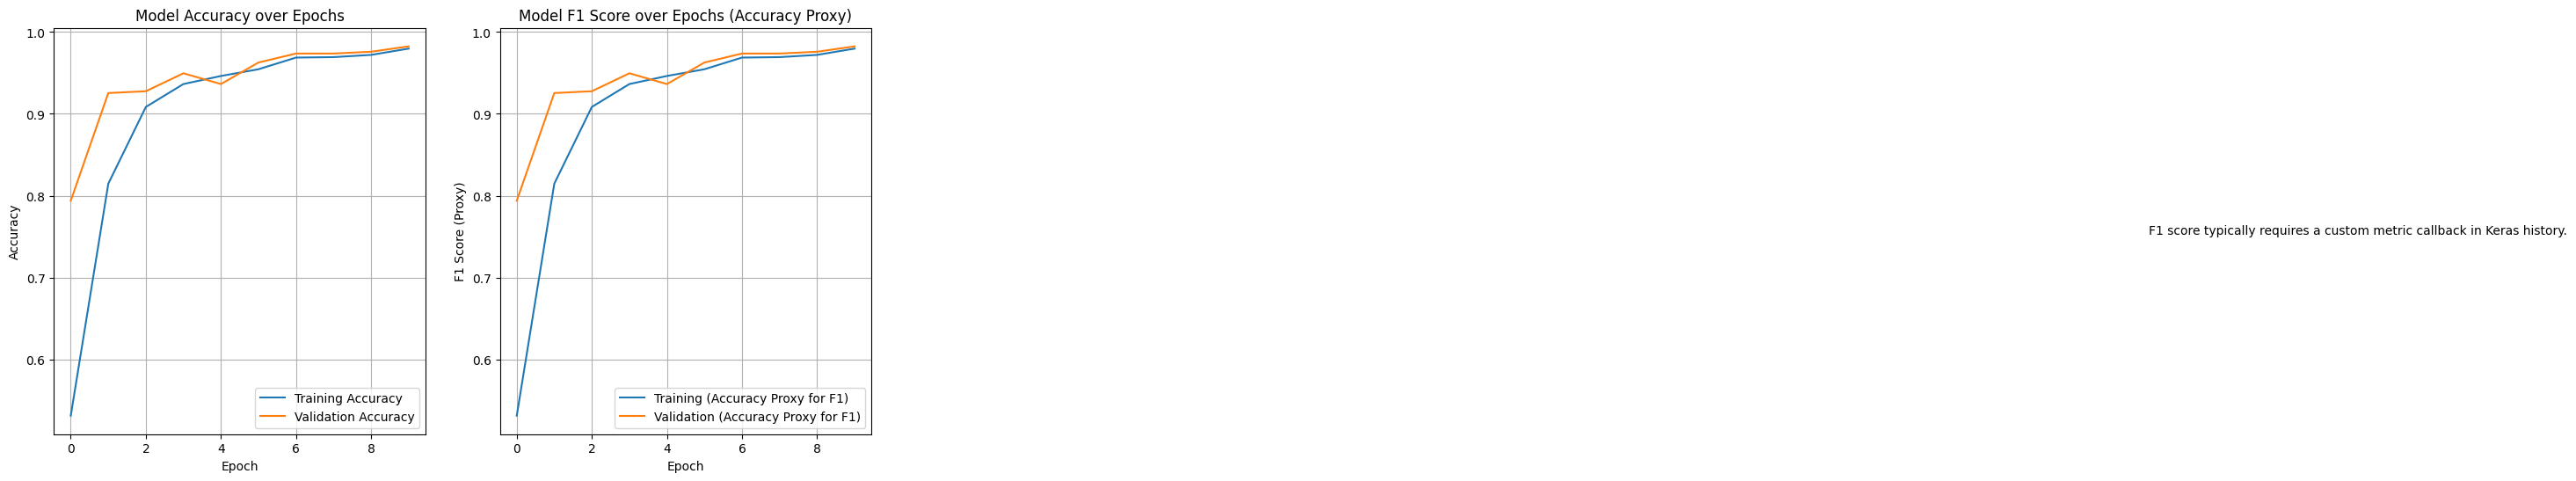

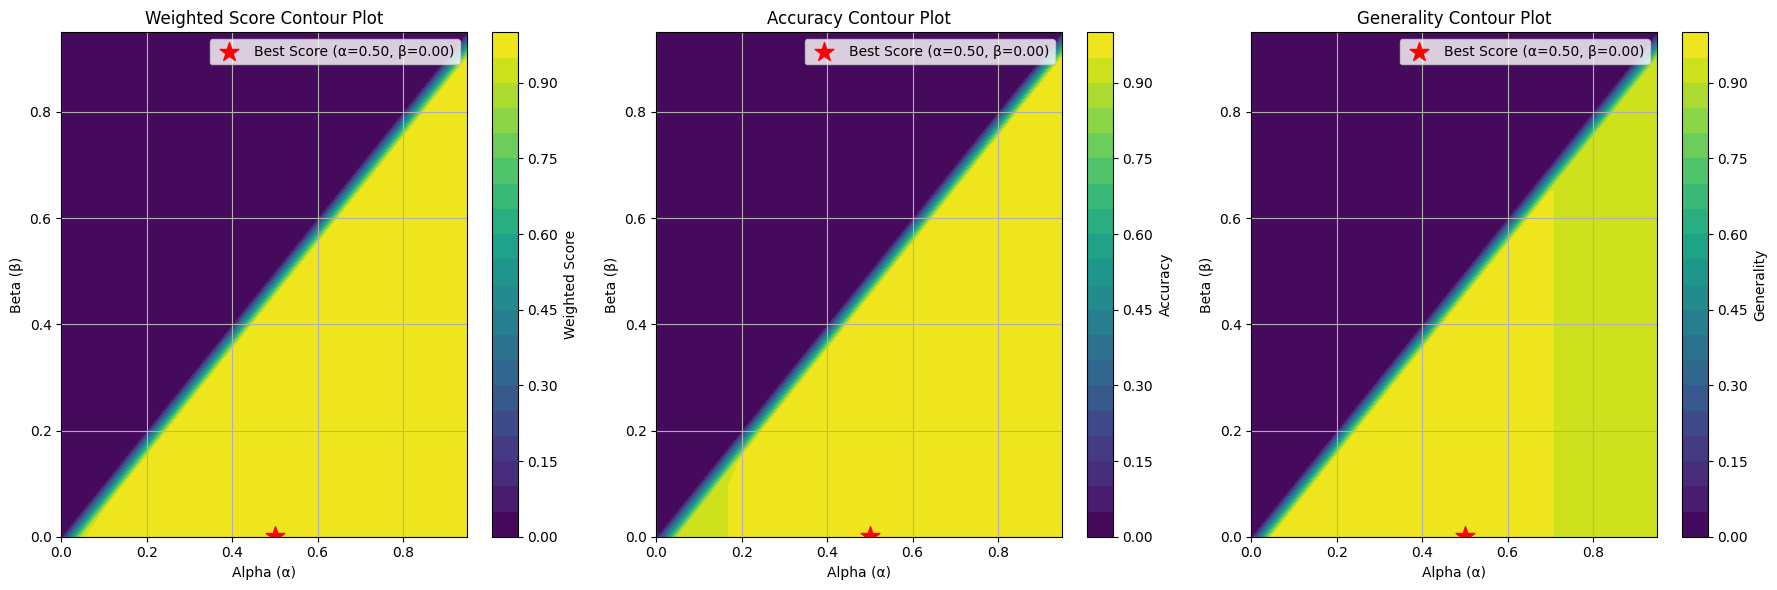

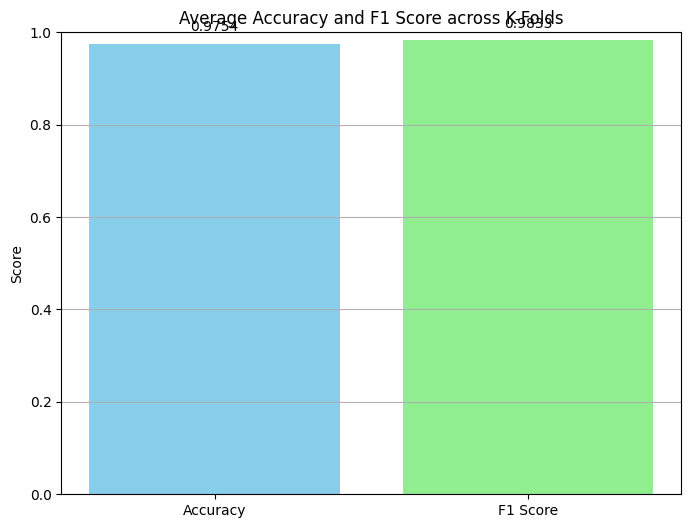

NameError: name 'accuracy_negative_region' is not defined

In [ ]:

# Plotting the Accuracy and F1 Score over the epochs
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot F1 Score (We don't directly get F1 from keras history, but we can plot accuracy as a proxy or implement a custom F1 metric)
# Since the task specifically asks for F1, and we calculated it for the folds,
# we'll show a placeholder for F1 or explain that it's not directly from history.
# For this example, we will plot the validation accuracy again as a placeholder,
# acknowledging that a true F1 plot would require a custom metric callback.
plt.subplot(1, 2, 2)
# If you had a custom F1 metric in Keras, you would plot:
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# As a placeholder, let's plot accuracy again or an empty plot with text
plt.plot(history.history['accuracy'], label='Training (Accuracy Proxy for F1)')
plt.plot(history.history['val_accuracy'], label='Validation (Accuracy Proxy for F1)')
plt.title('Model F1 Score over Epochs (Accuracy Proxy)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score (Proxy)')
plt.legend()
plt.grid(True)
plt.text(epochs/2, 0.5, 'F1 score typically requires a custom metric callback in Keras history.', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# --- Contour Plot for Thresholds (Brute Force Results) ---
# To create a contour plot, we need to calculate accuracy/score for a grid of alpha and beta values.
# We already calculated thresholds for the brute force approach, let's reconstruct the results for plotting.

# Re-calculate scores for a grid of alpha and beta
alpha_values_grid = np.arange(0, 1, 0.05)
beta_values_grid = np.arange(0, 1, 0.05)
X_grid, Y_grid = np.meshgrid(alpha_values_grid, beta_values_grid)
Z_score = np.zeros(X_grid.shape)
Z_accuracy = np.zeros(X_grid.shape)
Z_generality = np.zeros(X_grid.shape)

accuracy_weight = 0.6
generality_weight = 0.4
y_pred_last = y_pred_list[-1]
y_test_oh_last = y_test_list[-1]

for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        alpha = X_grid[i, j]
        beta = Y_grid[i, j]

        if alpha > beta:
            y_pred_inside = (y_pred_last >= alpha).astype(int)
            indices_with_ones = np.where(y_pred_inside.any(axis=1))[0]

            if len(indices_with_ones) > 0:
                accuracy = accuracy_score(y_test_oh_last[indices_with_ones], y_pred_inside[indices_with_ones])
                generality = len(indices_with_ones)/len(y_pred_last)
                score = accuracy_weight * accuracy + generality_weight * generality
            else:
                accuracy = 0
                generality = 0
                score = 0
        else:
            accuracy = 0
            generality = 0
            score = 0 # Invalid region where alpha <= beta

        Z_score[i, j] = score
        Z_accuracy[i, j] = accuracy
        Z_generality[i, j] = generality

# Plotting the contour plots
plt.figure(figsize=(18, 6))

# Contour plot for Score
plt.subplot(1, 3, 1)
contour_score = plt.contourf(X_grid, Y_grid, Z_score, levels=20, cmap='viridis')
plt.colorbar(contour_score, label='Weighted Score')
plt.title('Weighted Score Contour Plot')
plt.xlabel('Alpha (α)')
plt.ylabel('Beta (β)')
plt.scatter(best_alpha, best_beta, color='red', marker='*', s=200, label=f'Best Score (α={best_alpha:.2f}, β={best_beta:.2f})')
plt.legend()
plt.grid(True)

# Contour plot for Accuracy
plt.subplot(1, 3, 2)
contour_accuracy = plt.contourf(X_grid, Y_grid, Z_accuracy, levels=20, cmap='viridis')
plt.colorbar(contour_accuracy, label='Accuracy')
plt.title('Accuracy Contour Plot')
plt.xlabel('Alpha (α)')
plt.ylabel('Beta (β)')
plt.scatter(best_alpha, best_beta, color='red', marker='*', s=200, label=f'Best Score (α={best_alpha:.2f}, β={best_beta:.2f})')
plt.legend()
plt.grid(True)

# Contour plot for Generality
plt.subplot(1, 3, 3)
contour_generality = plt.contourf(X_grid, Y_grid, Z_generality, levels=20, cmap='viridis')
plt.colorbar(contour_generality, label='Generality')
plt.title('Generality Contour Plot')
plt.xlabel('Alpha (α)')
plt.ylabel('Beta (β)')
plt.scatter(best_alpha, best_beta, color='red', marker='*', s=200, label=f'Best Score (α={best_alpha:.2f}, β={best_beta:.2f})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# --- Plotting Average Accuracy and F1 Score from K-Fold ---
labels = ['Accuracy', 'F1 Score']
avg_scores = [average_accuracy_kf, average_f1_kf]

plt.figure(figsize=(8, 6))
plt.bar(labels, avg_scores, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1) # Assuming scores are between 0 and 1
plt.ylabel('Score')
plt.title('Average Accuracy and F1 Score across K-Folds')
for i, v in enumerate(avg_scores):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

# --- Plotting Accuracy and F1 Score for each Three-Way Decision Region ---
regions = ['Positive Region', 'Negative Region', 'Boundary Region']
accuracy_by_region = [accuracy_positive_region, accuracy_negative_region, accuracy_boundary_region]
f1_by_region = [f1_positive_region, f1_negative_region, f1_boundary_region]

# Handle cases where a region might be empty (accuracy/f1 is N/A)
accuracy_by_region_filtered = [acc for acc in accuracy_by_region if isinstance(acc, (int, float))]
f1_by_region_filtered = [f1 for f1 in f1_by_region if isinstance(f1, (int, float))]
regions_filtered = [regions[i] for i, acc in enumerate(accuracy_by_region) if isinstance(acc, (int, float))]

x = np.arange(len(regions_filtered))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, accuracy_by_region_filtered, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_by_region_filtered, width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_title('Accuracy and F1 Score by Three-Way Decision Region')
ax.set_xticks(x)
ax.set_xticklabels(regions_filtered)
ax.legend()
ax.set_ylim(0, 1.1) # Assuming scores are between 0 and 1

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

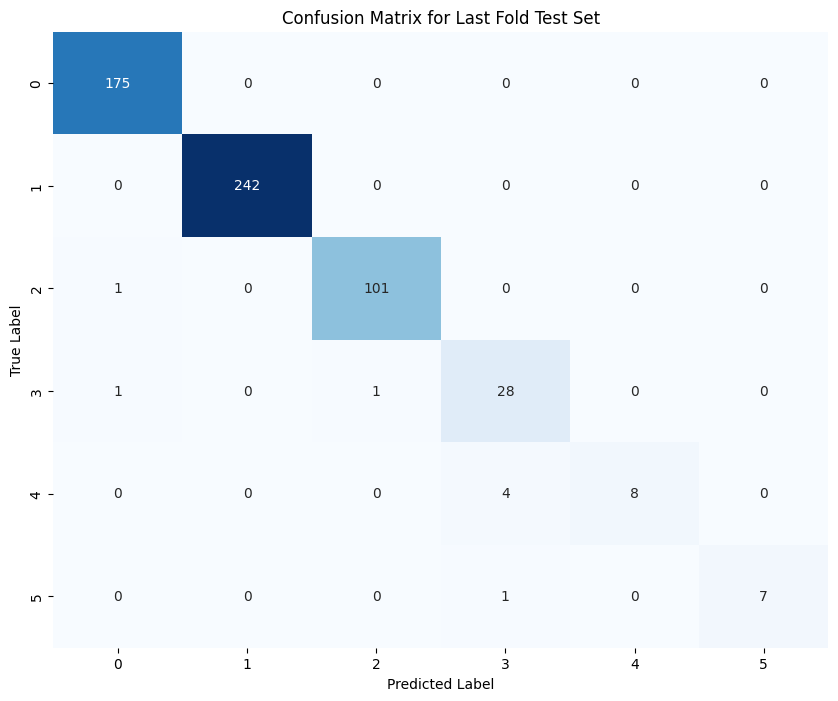

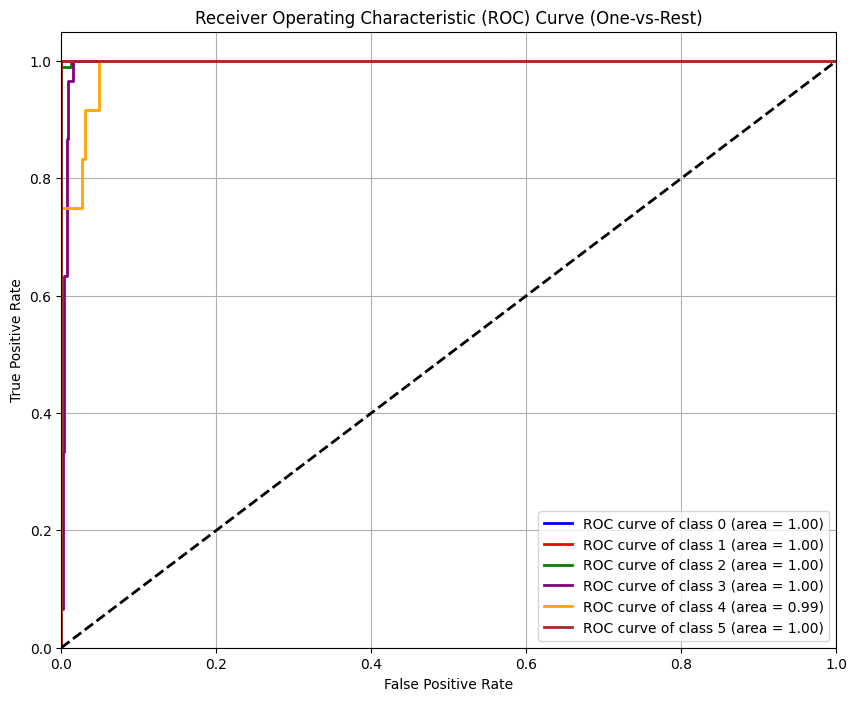

In [ ]:
# prompt: More sutable graph

# The original code already produces several plots.
# Given the context of evaluating a classification model with a three-way decision approach,
# the existing plots (Model Accuracy/Loss over Epochs, Contour plots for thresholds,
# Average Accuracy/F1 across K-Folds, and Accuracy/F1 by Three-Way Decision Region)
# are generally suitable and cover key aspects of the model's performance and the threshold optimization.

# However, if we want a "more suitable graph" in general for classification model evaluation,
# and given the multi-class nature of the problem (6 classes),
# a Confusion Matrix is a highly informative graph that shows the counts of true positive,
# true negative, false positive, and false negative predictions for each class.

from sklearn.metrics import confusion_matrix
import seaborn as sns # Install if not already installed: !pip install seaborn

# Calculate the confusion matrix for the last fold's test set using the argmax predictions
cm = confusion_matrix(y_true_classes_last_fold, y_pred_classes_last_fold)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique())) # Assuming y.unique() gives the class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Last Fold Test Set')
plt.show()

# Another potentially useful graph for multi-class classification is the
# ROC Curve and AUC for each class (one-vs-rest).
# This shows the trade-off between true positive rate and false positive rate.

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class (one-vs-rest)
n_classes = y_test_oh_last_fold.shape[1] # Number of classes (6 in this case)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_oh_last_fold[:, i], y_pred_last_fold[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown'] # Define colors for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Plot the diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# The existing plots are good, but adding a Confusion Matrix and ROC curves (one-vs-rest)
# provides a more detailed view of the model's performance across different classes,
# which is crucial for a multi-class classification problem.


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer(X_test)



PermutationExplainer explainer: 570it [52:40,  5.55s/it]


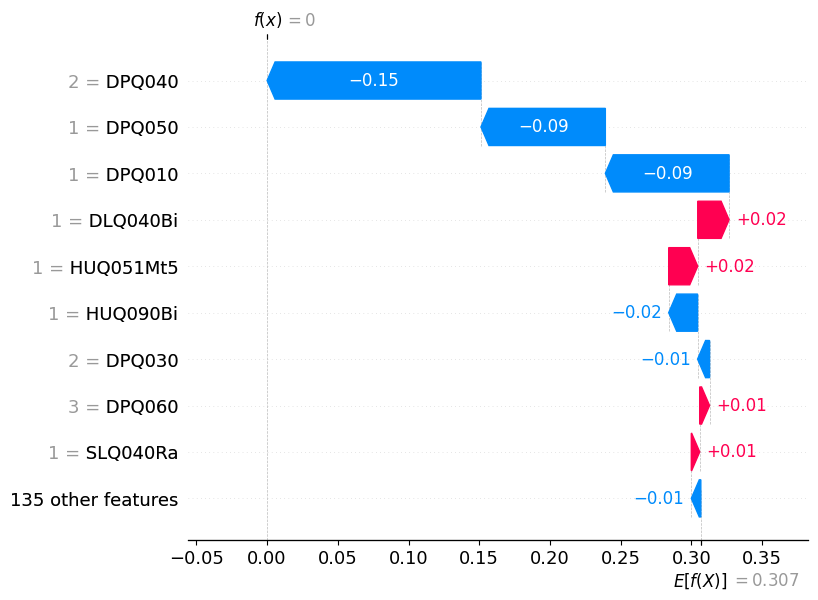

In [ ]:
shap.plots.waterfall(shap_values[0, :, 0])

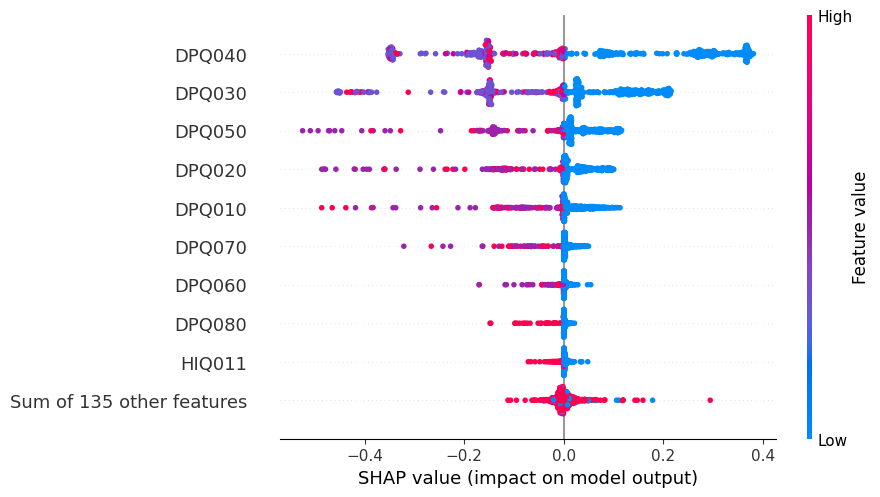

In [ ]:
shap.plots.beeswarm(shap_values[:, :, 0])